In [1]:
from __future__ import unicode_literals
# -*- coding: utf-8 -*-
STOP_WORDS = """
 ابھی از 
 اس استعمال اسی اسے البتہ الف ان اندر اور اوپر اکثر اگر
 اگرچہ اگلے ایسا ایسی ایسے اے بار بارے باوجود باہر بظاہر بعض بغیر بلکہ بن
 بھر بھریں بھی بہت بے تا تاکہ تب تحت تر تمام
 تو تک جب سوال 
 جبکہ جو حالانکہ حالاں خلاف
 خود سے میں چنانچہ دیر ذریعے تھا هے ایک آپ
 سا ساتھ سامنے سب تھی تھے
 سکا سکتا سکتے سی سے شان شاید صرف صورت ضرورت ضروری طرح طرف طور علاوہ عین غیر 
 لہذا لیکن لیں لیے لے مجھ مجھے مزید مقابلے مل مکمل مگر 
 نا نہ نہیں نیچے واقعی والا والوں والی والے وجہ وغیرہ وہ وہاں وہی وہیں وی ویسے پاس
 پایا پر پوری پھر پیچھے چونکہ چکی
 ڈالے کئے کافی کبھی کسی کم 
 کوئی کچھ کہ کہا کہہ کہیں کہے کیونکہ کیے کے گئی
 گئے گا گویا گی گے ہاں ہر ہمیشہ ہو ہوئی ہوئیں ہوئے ہوا ہوتا
 ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیں ہے یا یات یعنی یقینا یہ یہاں یہی یہیں ھیں
 ہوگی تقریباً
 کا کو کی نے ہوتو پہلے کر
 اپنا حتى كہ ميں لئیے 
 بعد ارادہ افاقہ آخر
""".split()

In [5]:
import pyodbc

from gensim.models.fasttext import FastText 

conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=G:\Softwares\EQWH-V6.4-190407\EasyHadees - Copy.mdb;')
cursor = conn.cursor()
cursor.execute("select top 10000 urdutext from ahadith where urdutext like '%وضو%'")

sentences = []
#joined_sentences = []
for row in cursor.fetchall():      
    x1 = row[0]  #'ابوالنعمان، ابوعوانہ، ابی بشر، یوسف بن ماہک، عبداللہ بن عمرو (رض) کہتے ہیں کہ ایک سفر میں نبی (صلی اللہ علیہ وآلہ وسلم) ہم سے پیچھے رہ گئے'
    sanad = row[0]
    x2= x1.split(' کہ ')
    if(len(x2)>0):
        sanad = ''
        for i in range(1,len(x2)):
            sanad += x2[i]
    #print(sanad)
    #print()
    splitted = sanad.split(' ')
    splitted_clean = []
    #sen = ''
    for token in splitted:
        token = token.replace(')','').replace('(','').replace('،','').replace('۔','').replace(':','').replace('؟','')
        if token != '' and token not in STOP_WORDS and str.isnumeric(token)==False:
            splitted_clean.append(token)
            #sen += token + ' '
    sentences.append(splitted_clean)   
    #joined_sentences.append(sen)
#joined_sentences


In [9]:

model = FastText(size=4, window=3, min_count=1)  # instantiate
model.build_vocab(sentences=sentences)
model.train(sentences=sentences, total_examples=len(sentences), epochs=100)

# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
#print(words)
# access vector for one word
#print(model['ٹخنوں'])
# save model
model.save('modelf.bin')
# load model
#new_model = model.load('modelf.bin')
#print(new_model)

FastText(vocab=22724, size=4, alpha=0.025)


In [10]:
model.most_similar(positive='وضو', topn=100)

C:\Users\admin\Anaconda3\envs\islamic qa\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('روٹیاں', 0.9998134970664978),
 ('پلا', 0.9997643232345581),
 ('رکھا', 0.9990854263305664),
 ('یتے', 0.998924970626831),
 ('دبایا', 0.9988879561424255),
 ('بل', 0.9987574815750122),
 ('ہاتھی', 0.998566210269928),
 ('کنویں', 0.998488187789917),
 ('کندھا', 0.9984580874443054),
 ('آٹے', 0.998374342918396),
 ('گھاس', 0.9983240962028503),
 ('تکہاتھ', 0.9983031749725342),
 ('ڈھیر', 0.9982219934463501),
 ('اتارے', 0.998073935508728),
 ('کھالیتے', 0.9979915022850037),
 ('پیؤں', 0.9978817701339722),
 ('چڑیا', 0.9975104928016663),
 ('سینہ', 0.9973157048225403),
 ('گوشت', 0.9972144961357117),
 ('بچے', 0.9971259236335754),
 ('سیر', 0.9967588782310486),
 ('گھسیٹ', 0.9966670274734497),
 ('اتاردو', 0.9964876174926758),
 ('کھایا\r\n', 0.9964848756790161),
 ('گاڑ', 0.9964651465415955),
 ('پلیٹ', 0.9963722229003906),
 ('دائیں', 0.9963110685348511),
 ('لگالیا', 0.9962664842605591),
 ('طرحبائیں', 0.9962325096130371),
 ('لتھڑے', 0.9962201118469238),
 ('چھاتیوں', 0.9961063861846924),
 ('گراتے', 0.99604070

C:\Users\admin\Anaconda3\envs\islamic qa\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


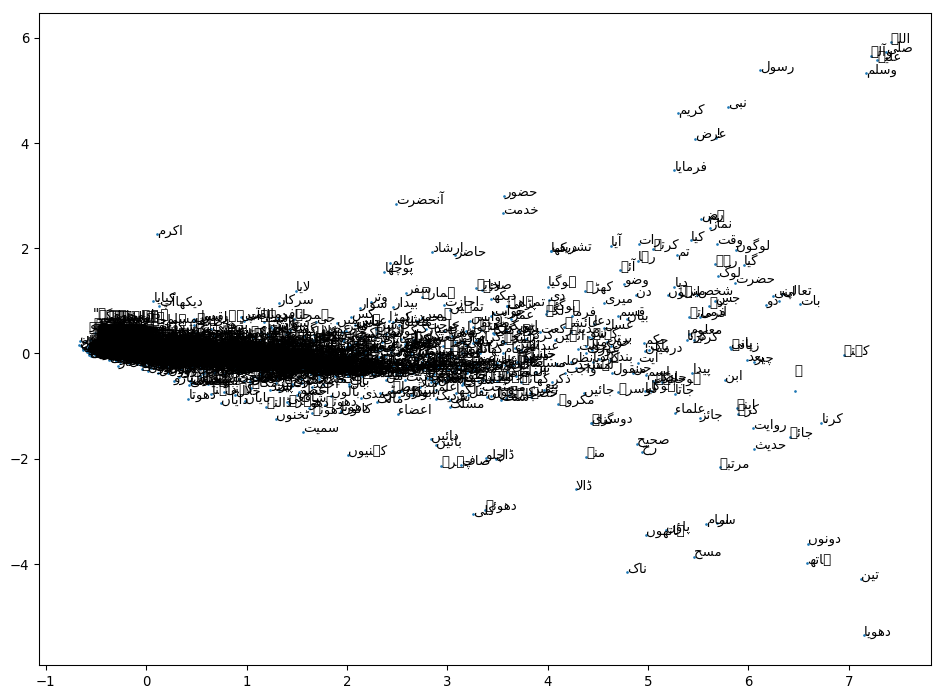

In [151]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
from bidi import algorithm as bidialg
import arabic_reshaper

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 9), dpi=96, facecolor='w', edgecolor='k')

pyplot.scatter(result[:, 0], result[:, 1], s=1)

words = list(model.wv.vocab)
for i, word in enumerate(words):
    text = bidialg.get_display( arabic_reshaper.reshape(word))
    #text = bidialg.get_display(u''+word+'')
    #print(text,'  ',word)
    pyplot.annotate(text, xy=(result[i, 0], result[i, 1]))

pyplot.show()

In [8]:
model.similarity('مسح','وضو')

C:\Users\admin\Anaconda3\envs\islamic qa\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.4062568687914277